In [1]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,MaxPooling2D,Flatten
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import random
print(tf.__version__)

2.9.1


In [2]:
df = pd.read_csv('fashionMnist_new2.csv')

In [3]:
df_cd_temp = df

# normal model

In [4]:
myacc = np.zeros((20,5))

for myround in range(1,21):
    random.seed(myround)
    np.random.seed(myround)
    tf.random.set_seed(myround)
    data = df.sample(frac=1, random_state=myround)
    df_train = data.iloc[:20000,:]
    df_test = data.iloc[20000:22000,:]
    df_train = df_train.drop(columns="Dffclt")
    for mydiff in range (5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        df_test_temp = df_test_temp.drop(columns="Dffclt")
        
        trainX = df_train.drop(columns="class")
        trainY = df_train['class']
        testX = df_test_temp.drop(columns="class")
        testY = df_test_temp['class']
        trainX=np.array(trainX)
        testX=np.array(testX)
        trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
        testX = testX.reshape((testX.shape[0], 28, 28, 1))
        trainX = trainX/255
        testX = testX/255
        trainY = np_utils.to_categorical(trainY,10)
        testY = np_utils.to_categorical(testY,10)

        from keras.models import load_model
        model = load_model('FashionMnistNormal'+ str(myround) + '.h5')
        myacc[myround-1,mydiff] = (model.evaluate(testX,testY)[1])


TypeError: weight_decay is not a valid argument, kwargs should be empty  for `optimizer_experimental.Optimizer`.

In [ ]:
myacc

In [ ]:
nn = 0
meanPerBin = np.zeros(5)
for myturn in range (5):
    meanPerBin[myturn] = np.mean(myacc[:, myturn])
    nn += (np.mean(myacc[:, myturn]))
print(nn/5)
meanPerBin

In [ ]:
myhist = np.zeros((20,5))

for myround in range(1,21):
    df_cd = df_cd_temp.sample(frac=1, random_state=myround)
    df_cd1 =  df_cd#.drop(columns="Dffclt")
    df_train = df_cd1.iloc[:20000,:]
    df_test = df_cd1.iloc[20000:22000,:]
    df_train = df_train.drop(columns="Dffclt")
    for mydiff in range (5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        myhist[myround-1,mydiff] = len(df_test_temp)
myhist

In [ ]:
myhistAccum = np.zeros (5)
for histindex in range (5):
    myhistAccum[histindex] = np.sum(myhist[:, histindex])
print(myhistAccum)

In [ ]:
plt.bar(['0,2','2,4','4,6','6,8','8,10'], myhistAccum, color='green')
plt.title("number of instances per bin(normal dataset)")
plt.show()

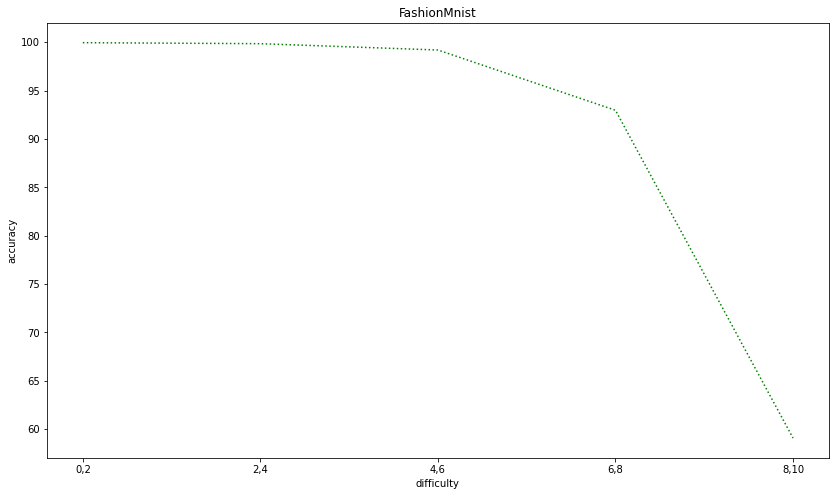

In [15]:
plt.title("FashionMnist")
plt.xlabel("difficulty")
plt.ylabel("accuracy")
plt.rcParams['figure.figsize'] = [14, 8]
#plt.ylim([0, 105])
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBin*100, ls=':', color = 'green')
plt.show()

In [14]:
#meanPerBin = [0.79911429, 0.8317701 , 0.8279106 , 0.81521758, 0.81394129,0.79659775, 0.78136204, 0.7744887 , 0.74064942, 0.67989944]
meanPerBin = np.array([0.99950602, 0.99847758, 0.9919301,  0.92959095, 0.59056556])



# contaminated model

In [5]:
myaccCont = np.zeros((20,5))

for myround in range(1,21):
    random.seed(myround)
    np.random.seed(myround)
    tf.random.set_seed(myround)
    df_cd = df.sample(frac=1, random_state=myround)
    hardest = df_cd[25000:]
    hardest = hardest.sort_values('Dffclt', ascending=False)
#     hardest =  hardest.drop(columns="Dffclt")
    hardest = hardest.iloc[:11000,:]
    hardest = hardest.sample(frac=1, random_state=myround)
    contaminated_trianset = hardest.iloc[:10000,:]
    hardest = hardest.iloc[10000:11000,:]
    data = df_cd#.drop(columns="Dffclt")
    df_train = data.iloc[:10000,:]
    df_train = df_train.append(contaminated_trianset, ignore_index=True)
    df_train = df_train.sample(frac=1, random_state=myround)
    df_test = data.iloc[20000:21000,:]
    df_test = df_test.append(hardest, ignore_index=True)
    df_test = df_test.sample(frac=1, random_state=myround)
    df_train = df_train.drop(columns="Dffclt")
    for mydiff in range (5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        df_test_temp = df_test_temp.drop(columns="Dffclt")
        trainX = df_train.drop(columns="class")
        trainY = df_train['class']
        testX = df_test_temp.drop(columns="class")
        testY = df_test_temp['class']
        trainX=np.array(trainX)
        testX=np.array(testX)
        trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
        testX = testX.reshape((testX.shape[0], 28, 28, 1))
        trainX = trainX/255
        testX = testX/255
        trainY = np_utils.to_categorical(trainY,10)
        testY = np_utils.to_categorical(testY,10)
        from keras.models import load_model
        model = load_model('FashionMnistContaminated'+ str(myround) + '.h5')
        myaccCont[myround-1,mydiff] = (model.evaluate(testX,testY)[1])


TypeError: weight_decay is not a valid argument, kwargs should be empty  for `optimizer_experimental.Optimizer`.

In [31]:
myaccCont

array([[0.89952153, 0.88481677, 0.907767  , 0.90640396, 0.91295546],
       [0.89320385, 0.88764048, 0.92592591, 0.89322919, 0.90220517],
       [0.87684727, 0.91627908, 0.92195123, 0.89830506, 0.913001  ],
       [0.88732392, 0.90769231, 0.91500002, 0.90237468, 0.90325767],
       [0.90497738, 0.86597937, 0.86818182, 0.89398283, 0.90059054],
       [0.9375    , 0.89999998, 0.91121495, 0.91773778, 0.89990091],
       [0.92307693, 0.8917526 , 0.884058  , 0.8938992 , 0.90652388],
       [0.90206188, 0.89952153, 0.91443849, 0.88833749, 0.90963256],
       [0.90306121, 0.86390531, 0.89393938, 0.92647058, 0.91448009],
       [0.90547264, 0.90109891, 0.87782806, 0.90575916, 0.91321498],
       [0.90594059, 0.89423078, 0.91623038, 0.922252  , 0.9152047 ],
       [0.880597  , 0.90206188, 0.8952381 , 0.90726817, 0.90662652],
       [0.88625592, 0.8888889 , 0.91000003, 0.91223407, 0.90457255],
       [0.89999998, 0.90769231, 0.92424244, 0.90231365, 0.90277779],
       [0.93969852, 0.93000001, 0.

In [32]:
nnCont = 0
meanPerBinCont = np.zeros(5)
for myturn in range (5):
    meanPerBinCont[myturn] = np.mean(myaccCont[:, myturn])
    nnCont += (np.mean(myaccCont[:, myturn]))
print(nnCont/5)
meanPerBinCont

0.9016584253311157


array([0.90280207, 0.89392695, 0.90100326, 0.90555697, 0.90500288])

In [33]:
myhistCont = np.zeros((20,5))

for myround in range(1,21):
    df_cd = df_cd_temp.sample(frac=1, random_state=myround)
    hardest= df_cd[25000:]
    hardest=hardest.sort_values('Dffclt', ascending=False)
    #hardest=  hardest.drop(columns="Dffclt")
    hardest = hardest.iloc[:11000,:]
    shuffled_hardest = hardest.sample(frac=1, random_state=myround)
    contaminated_trianset = shuffled_hardest.iloc[:10000,:]
    hardest = shuffled_hardest.iloc[10000:11000,:]
    df_cd1 =  df_cd#.drop(columns="Dffclt")
    df_train = df_cd1.iloc[:10000,:]
    df_train = df_train.append(contaminated_trianset, ignore_index=True)
    df_train = df_train.sample(frac=1, random_state=myround)
    df_train = df_train.drop(columns="Dffclt")
    df_test = df_cd1.iloc[20000:21000,:]
    df_test = df_test.append(hardest, ignore_index=True)
    df_test = df_test.sample(frac=1, random_state=myround)
    for mydiff in range (5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        myhistCont[myround-1,mydiff] = len(df_test_temp)
myhistCont

array([[ 209.,  191.,  206.,  406.,  988.],
       [ 206.,  178.,  189.,  384., 1043.],
       [ 203.,  215.,  205.,  354., 1023.],
       [ 213.,  195.,  200.,  379., 1013.],
       [ 221.,  194.,  220.,  349., 1016.],
       [ 208.,  180.,  214.,  389., 1009.],
       [ 195.,  194.,  207.,  377., 1027.],
       [ 194.,  209.,  187.,  403., 1007.],
       [ 196.,  169.,  198.,  408., 1029.],
       [ 201.,  182.,  221.,  382., 1014.],
       [ 202.,  208.,  191.,  373., 1026.],
       [ 201.,  194.,  210.,  399.,  996.],
       [ 211.,  207.,  200.,  376., 1006.],
       [ 210.,  195.,  198.,  389., 1008.],
       [ 199.,  200.,  212.,  372., 1017.],
       [ 210.,  194.,  191.,  389., 1016.],
       [ 187.,  226.,  222.,  381.,  984.],
       [ 211.,  204.,  194.,  389., 1002.],
       [ 199.,  204.,  195.,  411.,  991.],
       [ 196.,  225.,  195.,  387.,  997.]])

In [34]:
myhistAccumCont = np.zeros (5)
for histindex in range (5):
    myhistAccumCont[histindex] = np.sum(myhistCont[:, histindex])
print(myhistAccumCont)

[ 4072.  3964.  4055.  7697. 20212.]


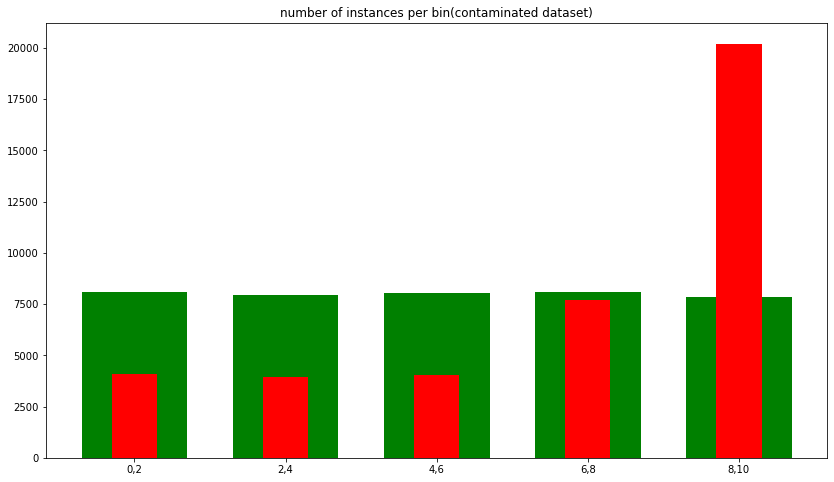

In [35]:
plt.bar(['0,2','2,4','4,6','6,8','8,10'], myhistAccum,width=0.7, color='green')
plt.bar(['0,2','2,4','4,6','6,8','8,10'], myhistAccumCont,width=0.3, color = 'red')

plt.title("number of instances per bin(contaminated dataset)")
plt.show()

In [16]:
meanPerBinCont = np.array([0.99756604, 0.98880464, 0.97472332, 0.87867653, 0.66231571])

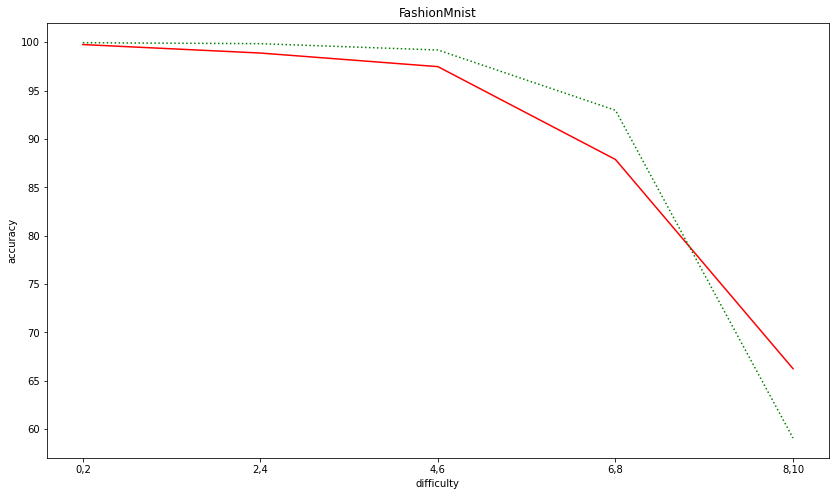

In [36]:
plt.title("FashionMnist")
plt.xlabel("difficulty")
plt.ylabel("accuracy")
plt.rcParams['figure.figsize'] = [14, 8]
#plt.ylim([0, 105])
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont*100, ls='-', color = 'red')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBin*100, ls=':', color = 'green')
plt.show()

# Contaminate model on normal data

In [37]:
myaccCont_nor = np.zeros((20,5))

for myround in range(1,21):
    random.seed(myround)
    np.random.seed(myround)
    tf.random.set_seed(myround)
    data = df.sample(frac=1, random_state=myround)
    df_train = data.iloc[:20000,:]
    df_test = data.iloc[20000:22000,:]
    df_train = df_train.drop(columns="Dffclt")
    for mydiff in range (5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        df_test_temp = df_test_temp.drop(columns="Dffclt")
        
        trainX = df_train.drop(columns="class")
        trainY = df_train['class']
        testX = df_test_temp.drop(columns="class")
        testY = df_test_temp['class']
        trainX=np.array(trainX)
        testX=np.array(testX)
        trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
        testX = testX.reshape((testX.shape[0], 28, 28, 1))
        trainX = trainX/255
        testX = testX/255
        trainY = np_utils.to_categorical(trainY,10)
        testY = np_utils.to_categorical(testY,10)
        from keras.models import load_model
        model = load_model('FashionMnistContaminated'+ str(myround) + '.h5')
        myaccCont_nor[myround-1,mydiff] = (model.evaluate(testX,testY)[1])


13/13 [==============================] - 0s 5ms/step - loss: 0.2475 - accuracy: 0.9415


In [38]:
nnCont_nor = 0
meanPerBinCont_nor = np.zeros(5)
for myturn in range (5):

    meanPerBinCont_nor[myturn] = np.mean(myaccCont_nor[:, myturn])
    nnCont_nor += (np.mean(myaccCont_nor[:, myturn]))
print(nnCont_nor/5)
meanPerBinCont_nor

0.9024561089277269


array([0.90373788, 0.89864144, 0.90110891, 0.90063284, 0.90815947])

In [39]:
myhistCont_nor = np.zeros((5,10))

for myroundCont_nor in range(1,6):
    df_cd = df_cd_temp.sample(frac=1, random_state=myroundCont_nor)
    df_cd1 =  df_cd#.drop(columns="Dffclt")
    df_train = df_cd1.iloc[:20000,:]
    df_test = df_cd1.iloc[20000:22000,:]
    df_train = df_train.drop(columns="Dffclt")
    for mydiff in range (5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        myhistCont_nor[myroundCont_nor-1,mydiff] = len(df_test_temp)
myhistCont_nor

array([[403., 384., 417., 417., 379.,   0.,   0.,   0.,   0.,   0.],
       [399., 368., 401., 420., 412.,   0.,   0.,   0.,   0.,   0.],
       [394., 418., 413., 377., 398.,   0.,   0.,   0.,   0.,   0.],
       [425., 406., 400., 398., 371.,   0.,   0.,   0.,   0.,   0.],
       [402., 380., 423., 393., 402.,   0.,   0.,   0.,   0.,   0.]])

In [40]:
myhistAccumCont_nor = np.zeros (5)
for histindex in range (5):
    myhistAccumCont_nor[histindex] = np.sum(myhistCont_nor[:, histindex])
print(myhistAccumCont_nor)

[2023. 1956. 2054. 2005. 1962.]


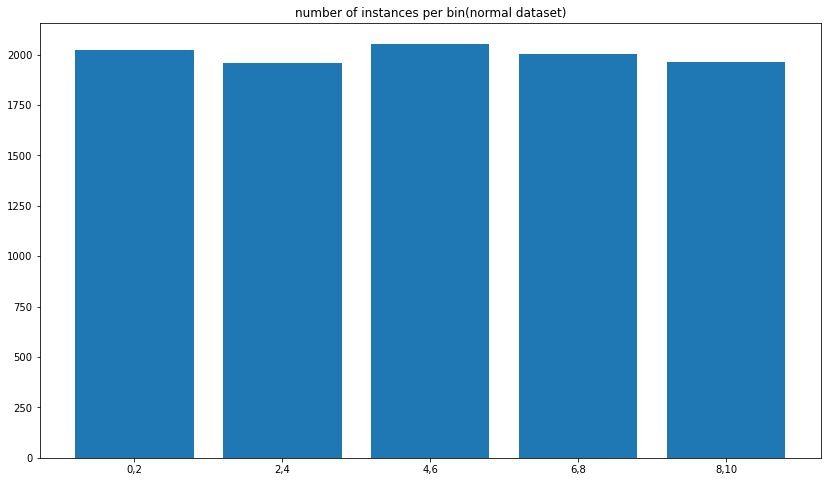

In [41]:
plt.bar(['0,2','2,4','4,6','6,8','8,10'], myhistAccumCont_nor)
plt.title("number of instances per bin(normal dataset)")
plt.show()

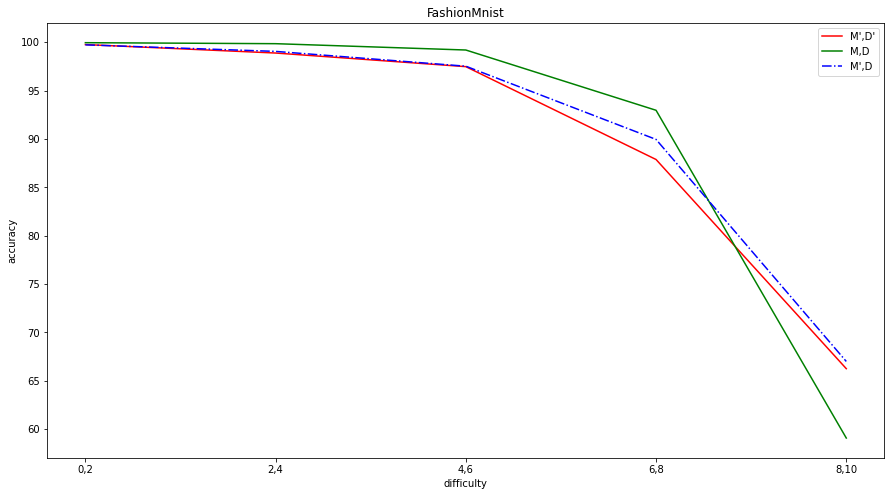

In [40]:
plt.title("FashionMnist")
plt.xlabel("difficulty")
plt.ylabel("accuracy")
#plt.ylim([0, 100])
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont*100, ls='-', color = 'red')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBin*100, ls='-', color = 'green')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont_nor*100, ls='-.', color = 'blue')
plt.legend(["M',D'","M,D", "M',D"])
plt.show()

# Balanced dataset

In [43]:
myaccBal = np.zeros((20,5))

for myround in range(1,21):
    random.seed(myround)
    np.random.seed(myround)
    tf.random.set_seed(myround)
    df_cd = df.sample(frac=1, random_state=myround)
    hardest = df_cd[25000:]
    hardest = hardest.sort_values('Dffclt', ascending=False)
    hardestbalanced = hardest[:1]
    for item_class in range (10):
        hardestTemp = hardest[hardest['class']==item_class]
        hardestbalanced = hardestbalanced.append(hardestTemp.iloc[:1100,:], ignore_index=True)
    hardestbalanced = hardestbalanced.iloc[1:,:]
    hardestbalanced = hardestbalanced.sample(frac=1, random_state=myround)
    contaminated_trianset = hardestbalanced.iloc[1000:11000,:]
    hardest = hardestbalanced.iloc[:1000,:]
    data = df_cd#.drop(columns="Dffclt")
    df_train = data.iloc[:10000,:]
    df_train = df_train.append(contaminated_trianset, ignore_index=True)
    df_train = df_train.sample(frac=1, random_state=myround)
    df_test = data.iloc[20000:21000,:]
    df_test = df_test.append(hardest, ignore_index=True)
    df_test = df_test.sample(frac=1, random_state=myround)
    df_train = df_train.drop(columns="Dffclt")
    for mydiff in range (5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        df_test_temp = df_test_temp.drop(columns="Dffclt")
        trainX = df_train.drop(columns="class")
        trainY = df_train['class']
        testX = df_test_temp.drop(columns="class")
        testY = df_test_temp['class']
        trainX=np.array(trainX)
        testX=np.array(testX)
        trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
        testX = testX.reshape((testX.shape[0], 28, 28, 1))
        trainX = trainX/255
        testX = testX/255
        trainY = np_utils.to_categorical(trainY,10)
        testY = np_utils.to_categorical(testY,10)
        from keras.models import load_model
        model = load_model('FashionMnistBalanced'+ str(myround) + '.h5')
        myaccBal[myround-1,mydiff] = (model.evaluate(testX,testY)[1])


32/32 [==============================] - 0s 4ms/step - loss: 0.2822 - accuracy: 0.9179


In [45]:
nnBal = 0
meanPerBinBal = np.zeros(5)
for myturn in range (5):
    print((np.mean(myaccBal[:, myturn])))
    meanPerBinBal[myturn] = np.mean(myaccBal[:, myturn])
    nnBal += (np.mean(myaccBal[:, myturn]))
print(nnBal/5)
meanPerBinBal

0.9075592637062073
0.8950984627008438
0.9034213721752167
0.8978448778390884
0.904573941230774
0.9016995835304261


array([0.90755926, 0.89509846, 0.90342137, 0.89784488, 0.90457394])

In [46]:
myhistBal = np.zeros((20,5))

for myround in range(1,21):
    df_cd = df_cd_temp.sample(frac=1, random_state=myround)
    hardest= df_cd[25000:]
    hardest=hardest.sort_values('Dffclt', ascending=False)
    hardestbalanced = hardest[:1]
    for item_class in range (10):
        hardestTemp = hardest[hardest['class']==item_class]
        hardestbalanced = hardestbalanced.append(hardestTemp.iloc[:1100,:], ignore_index=True)

    hardestbalanced = hardestbalanced.iloc[1:,:]
    hardestbalanced = hardestbalanced.sample(frac=1, random_state=myround)
    #hardestbalanced=  hardestbalanced.drop(columns="Dffclt")
    contaminated_trianset = hardestbalanced.iloc[1000:11000,:]
    hardest = hardestbalanced.iloc[:1000,:]
    df_cd1=  df_cd#.drop(columns="Dffclt")
    df_train = df_cd1.iloc[:10000,:]
    df_train = df_train.append(contaminated_trianset, ignore_index=True)
    df_train = df_train.sample(frac=1, random_state=myround)
    df_train = df_train.drop(columns="Dffclt")
    df_test = df_cd1.iloc[20000:21000,:]
    df_test = df_test.append(hardest, ignore_index=True)
    df_test = df_test.sample(frac=1, random_state=myround)
    for mydiff in range (5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        myhistBal[myround-1,mydiff] = len(df_test_temp)
myhistBal

array([[ 209.,  191.,  206.,  380., 1014.],
       [ 206.,  178.,  189.,  383., 1044.],
       [ 203.,  215.,  205.,  357., 1020.],
       [ 213.,  195.,  200.,  393.,  999.],
       [ 221.,  194.,  220.,  366.,  999.],
       [ 208.,  180.,  214.,  395., 1003.],
       [ 195.,  194.,  207.,  385., 1019.],
       [ 194.,  209.,  187.,  400., 1010.],
       [ 196.,  169.,  198.,  414., 1023.],
       [ 201.,  182.,  221.,  385., 1011.],
       [ 202.,  208.,  191.,  392., 1007.],
       [ 201.,  194.,  210.,  367., 1028.],
       [ 211.,  207.,  200.,  390.,  992.],
       [ 210.,  195.,  198.,  397., 1000.],
       [ 199.,  200.,  212.,  364., 1025.],
       [ 210.,  194.,  191.,  398., 1007.],
       [ 187.,  226.,  222.,  361., 1004.],
       [ 211.,  204.,  194.,  381., 1010.],
       [ 199.,  204.,  195.,  365., 1037.],
       [ 196.,  225.,  195.,  373., 1011.]])

In [47]:
myhistAccumBal = np.zeros (5)
for histindex in range (5):
    myhistAccumBal[histindex] = np.sum(myhistBal[:, histindex])
print(myhistAccumBal)

[ 4072.  3964.  4055.  7646. 20263.]


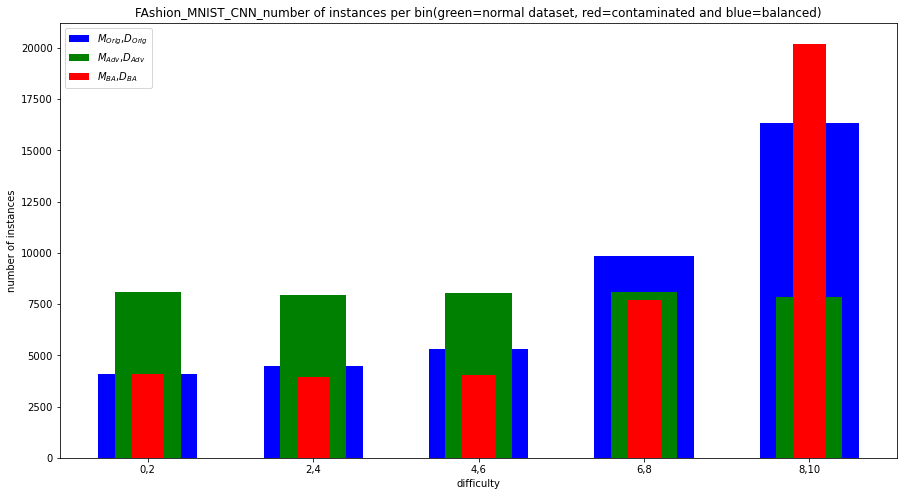

In [9]:
plt.xlabel("difficulty")
plt.ylabel("number of instances")
plt.bar(['0,2','2,4','4,6','6,8','8,10'], myhistAccumBal,width=0.6, color='blue')
plt.bar(['0,2','2,4','4,6','6,8','8,10'], myhistAccum,width=0.4, color='green')
plt.bar(['0,2','2,4','4,6','6,8','8,10'], myhistAccumCont,width=0.2, color = 'red')
plt.title("FAshion_MNIST_CNN_number of instances per bin(green=normal dataset, red=contaminated and blue=balanced)")
plt.legend(["$M_{Orig}$,$D_{Orig}$", "$M_{Adv}$,$D_{Adv}$", "$M_{BA}$,$D_{BA}$"])
plt.show()

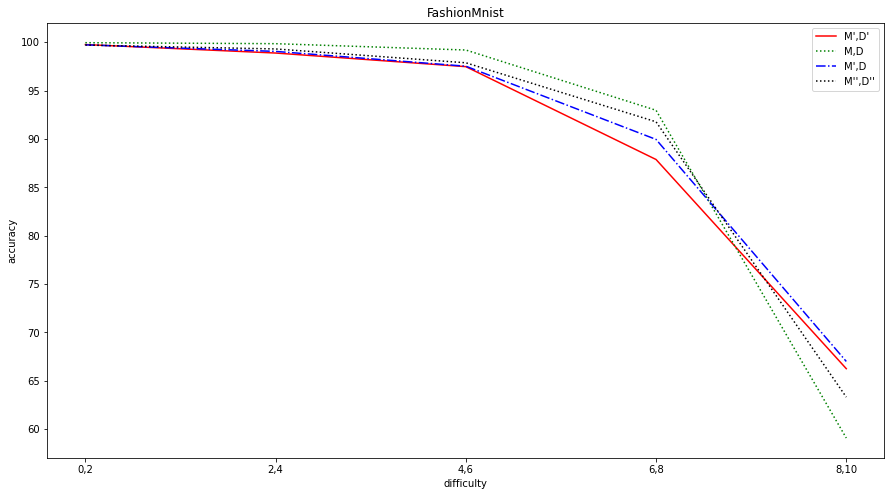

In [41]:
plt.title("FashionMnist")
plt.xlabel("difficulty")
plt.ylabel("accuracy")
#plt.ylim([0, 100])
plt.rcParams['figure.figsize'] = [10, 6]
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont*100, ls='-', color = 'red')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBin*100, ls=':', color = 'green')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont_nor*100, ls='-.', color = 'blue')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinBal*100, ls=':', color = 'black')
plt.legend(["M',D'","M,D", "M',D","M'',D''"])
plt.show()

# M'' on D

In [50]:
myaccBal_nor = np.zeros((20,5))

for myround in range(1,21):
    random.seed(myround)
    np.random.seed(myround)
    tf.random.set_seed(myround)
    data = df.sample(frac=1, random_state=myround)
    df_train = data.iloc[:20000,:]
    df_test = data.iloc[20000:22000,:]
    df_train = df_train.drop(columns="Dffclt")
    for mydiff in range (5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        df_test_temp = df_test_temp.drop(columns="Dffclt")
        
        trainX = df_train.drop(columns="class")
        trainY = df_train['class']
        testX = df_test_temp.drop(columns="class")
        testY = df_test_temp['class']
        trainX=np.array(trainX)
        testX=np.array(testX)
        trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
        testX = testX.reshape((testX.shape[0], 28, 28, 1))
        trainX = trainX/255
        testX = testX/255
        trainY = np_utils.to_categorical(trainY,10)
        testY = np_utils.to_categorical(testY,10)
        from keras.models import load_model
        model = load_model('FashionMnistBalanced'+ str(myround) + '.h5')
        myaccBal_nor[myround-1,mydiff] = (model.evaluate(testX,testY)[1])


13/13 [==============================] - 0s 4ms/step - loss: 0.2224 - accuracy: 0.9364


In [51]:
nnBal_nor = 0
meanPerBinBal_nor = np.zeros(5)
for myturn in range (5):
    print((np.mean(myaccBal_nor[:, myturn])))
    meanPerBinBal_nor[myturn] = np.mean(myaccBal_nor[:, myturn])
    nnBal_nor += (np.mean(myaccBal_nor[:, myturn]))
print(nnBal_nor/5)
meanPerBinBal_nor

0.9059220075607299
0.8973122626543045
0.9054788440465927
0.8990319311618805
0.90245923101902
0.9020408552885055


array([0.90592201, 0.89731226, 0.90547884, 0.89903193, 0.90245923])

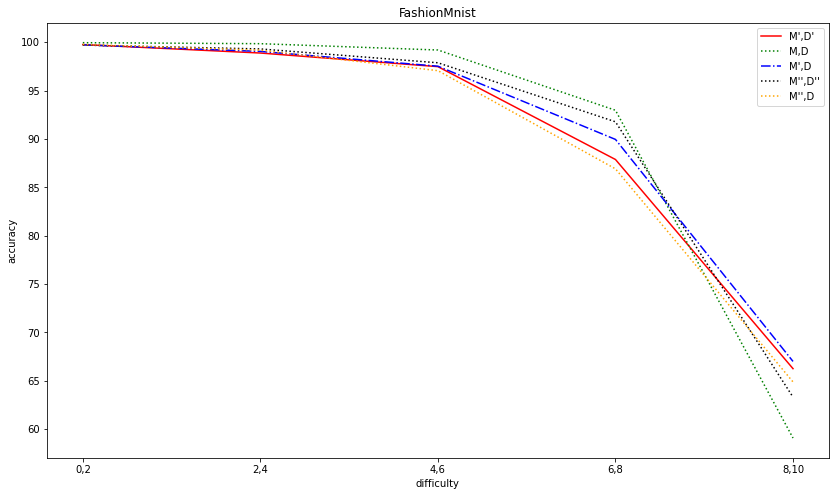

In [44]:
plt.title("FashionMnist")
plt.xlabel("difficulty")
plt.ylabel("accuracy")
#plt.ylim([0, 100])
#plt.figure(figsize=(20,10))
plt.rcParams['figure.figsize'] = [14, 8]
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont*100, ls='-', color = 'red')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBin*100, ls=':', color = 'green')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont_nor*100, ls='-.', color = 'blue')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinBal*100, ls=':', color = 'black')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinBal_nor*100, ls=':', color = 'orange')

plt.legend(["M',D'","M,D", "M',D","M'',D''","M'',D"])
plt.show()

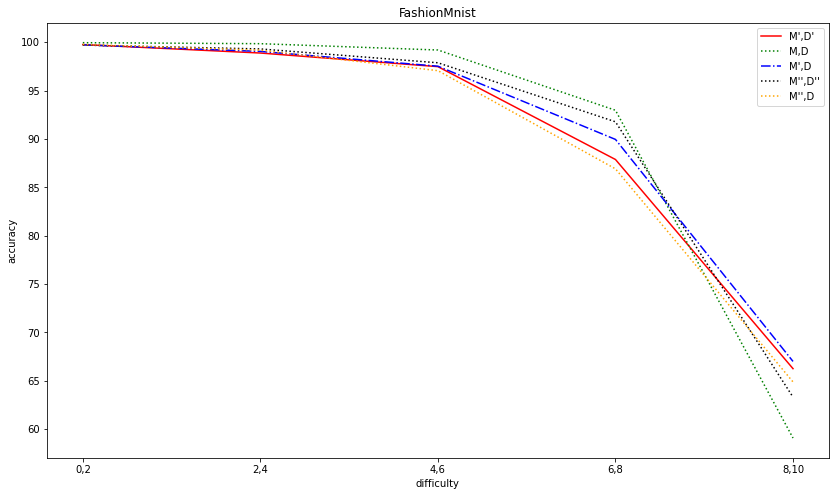

In [45]:
plt.title("FashionMnist")
plt.xlabel("difficulty")
plt.ylabel("accuracy")
#plt.ylim([0, 100])
# plt.figure(figsize=(16,8))
plt.rcParams['figure.figsize'] = [15, 8]
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont*100, ls='-', color = 'red')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBin*100, ls=':', color = 'green')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont_nor*100, ls='-.', color = 'blue')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinBal*100, ls=':', color = 'black')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinBal_nor*100, ls=':', color = 'orange')

plt.legend(["M',D'","M,D", "M',D","M'',D''","M'',D"])
plt.show()

# EasyOut 


In [54]:
myaccEasyOut = np.zeros((20,5))

for myround in range(1,21):
    random.seed(myround)
    np.random.seed(myround)
    tf.random.set_seed(myround)
    df_cd = df.sample(frac=1, random_state=myround)
    hardest = df_cd[25000:]
    hardest = hardest.sort_values('Dffclt', ascending=False)
    hardest = hardest.iloc[:11000,:]
    hardest = hardest.sample(frac=1, random_state=myround)
    contaminated_trianset = hardest.iloc[:10000,:]
    hardest = hardest.iloc[10000:11000,:]
    df_easyout = df_cd .iloc[:22000,:]
    df_easyout = df_easyout.sort_values('Dffclt', ascending=True)
    df_easyout = df_easyout.iloc[6000:,:]
    df_easyout = df_easyout.sample(frac=1, random_state=myround)
    data = df_easyout#.drop(columns="Dffclt")
    df_train = data.iloc[:10000,:]
    df_train = df_train.append(contaminated_trianset, ignore_index=True)
    df_train = df_train.sample(frac=1, random_state=myround)
    df_test = data.iloc[10000:11000,:]
    df_test = df_test.append(hardest, ignore_index=True)
    df_test = df_test.sample(frac=1, random_state=myround)
    df_train = df_train.drop(columns="Dffclt")
    for mydiff in range (1,5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        df_test_temp = df_test_temp.drop(columns="Dffclt")
        trainX = df_train.drop(columns="class")
        trainY = df_train['class']
        testX = df_test_temp.drop(columns="class")
        testY = df_test_temp['class']
        trainX=np.array(trainX)
        testX=np.array(testX)
        trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
        testX = testX.reshape((testX.shape[0], 28, 28, 1))
        trainX = trainX/255
        testX = testX/255
        trainY = np_utils.to_categorical(trainY,10)
        testY = np_utils.to_categorical(testY,10)
        from keras.models import load_model
        model = load_model('FashionMnistEasyout'+ str(myround) + '.h5')
        myaccEasyOut[myround-1,mydiff] = (model.evaluate(testX,testY)[1])


35/35 [==============================] - 0s 5ms/step - loss: 0.3680 - accuracy: 0.8932


In [56]:
nnEasyout = 0
meanPerBinEasyout = np.zeros(5)
for myturn in range (5):
    print((np.mean(myaccEasyOut[:, myturn])))
    meanPerBinEasyout[myturn] = np.mean(myaccEasyOut[:, myturn])
    nnEasyout += (np.mean(myaccEasyOut[:, myturn]))
print(nnEasyout/5)
meanPerBinEasyout

0.9028020650148392
0.893926951289177
0.9010032594203949
0.9055569678544998
0.9050028830766678
0.9016584253311157


array([0.90280207, 0.89392695, 0.90100326, 0.90555697, 0.90500288])

In [57]:
meanPerBinEasyout

array([0.90280207, 0.89392695, 0.90100326, 0.90555697, 0.90500288])

# Easyout on Normal

In [63]:
myaccEasy_nor = np.zeros((20,5))

for myround in range(1,21):
    random.seed(myround)
    np.random.seed(myround)
    tf.random.set_seed(myround)
    data = df.sample(frac=1, random_state=myround)
    df_train = data.iloc[:20000,:]
    df_test = data.iloc[22000:24000,:]
    df_train = df_train.drop(columns="Dffclt")
    for mydiff in range (5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        df_test_temp = df_test_temp.drop(columns="Dffclt")
        
        trainX = df_train.drop(columns="class")
        trainY = df_train['class']
        testX = df_test_temp.drop(columns="class")
        testY = df_test_temp['class']
        trainX=np.array(trainX)
        testX=np.array(testX)
        trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
        testX = testX.reshape((testX.shape[0], 28, 28, 1))
        trainX = trainX/255
        testX = testX/255
        trainY = np_utils.to_categorical(trainY,10)
        testY = np_utils.to_categorical(testY,10)
        from keras.models import load_model
        model = load_model('FashionMnistEasyout'+ str(myround) + '.h5')
        myaccEasy_nor[myround-1,mydiff] = (model.evaluate(testX,testY)[1])


13/13 [==============================] - 0s 4ms/step - loss: 0.3717 - accuracy: 0.8843


In [64]:
nnEasy_nor = 0
meanPerBinEasy_nor = np.zeros(5)
for myturn in range (5):
    print((np.mean(myaccEasy_nor[:, myturn])))
    
    meanPerBinEasy_nor[myturn] = np.mean(myaccEasy_nor[:, myturn])
    nnEasy_nor += (np.mean(myaccEasy_nor[:, myturn]))
print(nnEasy_nor/5)
meanPerBinEasy_nor

0.9055225521326065
0.9008202195167542
0.9001167207956314
0.9002214848995209
0.8972844272851944
0.9007930809259415


array([0.90552255, 0.90082022, 0.90011672, 0.90022148, 0.89728443])

# retrieve Data

In [2]:
# meanPerBin = np.array([0.90857169, 0.99608696, 0.99548023, 0.97322462, 0.78041297])
# meanPerBinCont = np.array([0.91473156, 0.99643455, 0.99000095, 0.97472413, 0.83111452])
# meanPerBinCont_nor = np.array([0.90819363, 0.99643015, 0.99205411, 0.97696814, 0.83540584])
# meanPerBinBal = np.array([0.91888459, 0.99669727, 0.99260397, 0.97652241, 0.81149581])
# meanPerBinBal_nor = np.array([0.91112821, 0.99640992, 0.99121775, 0.96850775, 0.82140897])
# meanPerBinEasyout = np.array([0.914731556, 0.99643454, 0.99000095, 0.97472413, 0.83111452])
# meanPerBinEasy_nor = np.array([0.90711125, 0.99745095, 0.99606984, 0.98523711, 0.90680507])

meanPerBin = np.array([0.99950602, 0.99847758, 0.9919301,  0.92959095, 0.59056556])
myhistAccum = np.array([8115., 7923., 8020., 8079., 7863.])
meanPerBinCont = np.array([0.99756604, 0.98880464, 0.97472332, 0.87867653, 0.66231571])
myhistAccumCont = np.array([ 4072.,  3964.,  4055.,  7697., 20212.])
meanPerBinCont_nor = np.array([0.99726853, 0.99049954, 0.97518302, 0.89944804, 0.66979686])
meanPerBinBal = np.array([0.99705398, 0.99303463, 0.97872548, 0.91767014, 0.6328844 ])
myhistAccumBal = np.array([ 4072.,  4458.,  5322.,  9829., 16319.])
meanPerBinBal_nor = np.array([0.99756678, 0.99176629, 0.97057815, 0.86900956, 0.64861565])
meanPerBinEasyout = np.array([ 0.98912431, 0.97634076, 0.88913382, 0.6612394 ])
meanPerBinEasy_nor = np.array([0.99565182, 0.98977152, 0.97497933, 0.90886738, 0.66209874])






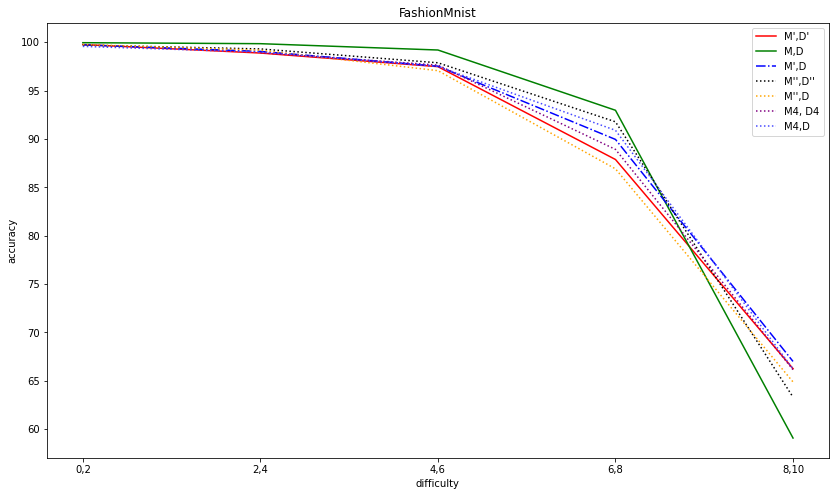

In [38]:
plt.title("FashionMnist")
plt.xlabel("difficulty")
plt.ylabel("accuracy")
#plt.ylim([0, 100])
# plt.figure(figsize=(16,8))
plt.rcParams['figure.figsize'] = [15, 8]
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont*100, ls='-', color = 'red')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBin*100, ls='-', color = 'green')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont_nor*100, ls='-.', color = 'blue')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinBal*100, ls=':', color = 'black')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinBal_nor*100, ls=':', color = 'orange')
plt.plot(['2,4','4,6','6,8','8,10'], meanPerBinEasyout*100, ls=':', color = 'purple')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinEasy_nor*100, ls=':', color = '#4649FF')


plt.legend(["M',D'","M,D", "M',D","M'',D''","M'',D", "M4, D4", "M4,D"])
#plt.legend(["M',D'","M,D", "M',D","M4, D4", "M4,D"])
plt.show()

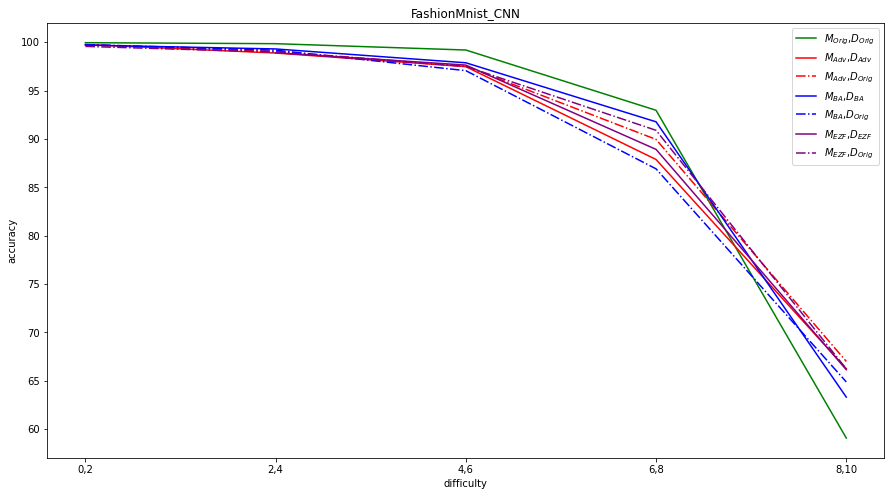

In [7]:
plt.title("FashionMnist_CNN")
plt.xlabel("difficulty")
plt.ylabel("accuracy")
#plt.ylim([0, 100])
#plt.figure(figsize=(16,8))
plt.rcParams['figure.figsize'] = [15, 8]
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBin*100, ls='-', color = 'green')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont*100, ls='-', color = 'red')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont_nor*100, ls='-.', color = 'red')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinBal*100, ls='-', color = 'blue')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinBal_nor*100, ls='-.', color = 'blue')
plt.plot(['2,4','4,6','6,8','8,10'], meanPerBinEasyout*100, ls='-', color = 'purple')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinEasy_nor*100, ls='-.', color = 'purple')
plt.legend(["$M_{Orig}$,$D_{Orig}$", "$M_{Adv}$,$D_{Adv}$", "$M_{Adv}$,$D_{Orig}$","$M_{BA}$,$D_{BA}$","$M_{BA}$,$D_{Orig}$", "$M_{EZF}$,$D_{EZF}$", "$M_{EZF}$,$D_{Orig}$"])
#plt.legend(["M',D'","M,D", "M',D","M4, D4", "M4,D"])
plt.show()

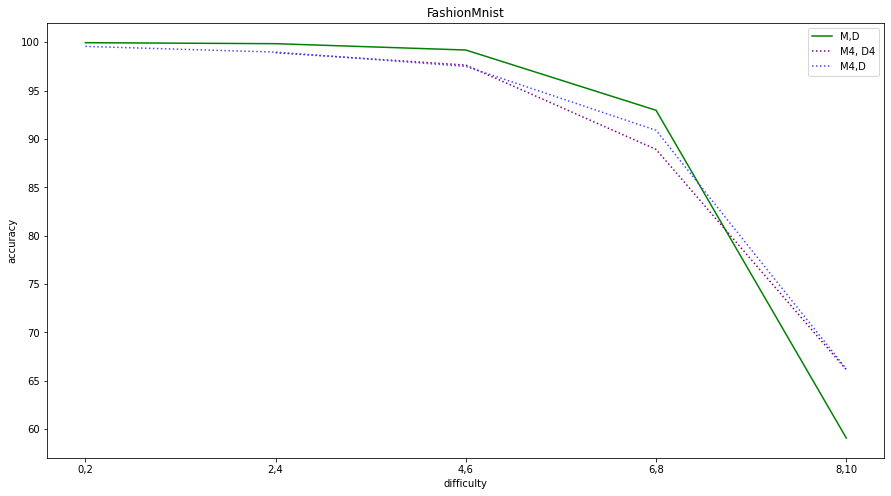

In [39]:
plt.title("FashionMnist")
plt.xlabel("difficulty")
plt.ylabel("accuracy")
#plt.ylim([85, 100])
# plt.figure(figsize=(16,8))
plt.rcParams['figure.figsize'] = [15, 8]
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBin*100, ls='-', color = 'green')
plt.plot(['2,4','4,6','6,8','8,10'], meanPerBinEasyout*100, ls=':', color = 'purple')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinEasy_nor*100, ls=':', color = '#4649FF')


plt.legend(["M,D", "M4, D4", "M4,D"])
plt.show()